<a href="https://colab.research.google.com/github/vishnuvryeruva/Dashboard/blob/main/Dashboard_Personality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependencies

In [ ]:
!pip install datashader

In [ ]:
!apt-get install libgeos++ libproj-dev
!pip install geoviews

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgeos-c1' for regex 'libgeos+'
Note, selecting 'libgeos-c1v5' for regex 'libgeos+'
Note, selecting 'libgeos-dev' for regex 'libgeos+'
Note, selecting 'libgeos-doc' for regex 'libgeos+'
Note, selecting 'libgeos-ruby1.8' for regex 'libgeos+'
Note, selecting 'libgeos++-dev' for regex 'libgeos+'
Note, selecting 'libgeos-3.6.2' for regex 'libgeos+'
Note, selecting 'ruby-geos' instead of 'libgeos-ruby1.8'
libgeos++-dev is already the newest version (3.6.2-1build2).
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-c1v5 is already the newest version (3.6.2-1build2).
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-doc is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
ruby-geos is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install hvplot

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install bqplot

#Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import holoviews as hv
import colorcet as cc
import param
import datashader as ds
import geoviews as gv
import hvplot as hvp
import panel

In [ ]:
import ipywidgets as widgets
import matplotlib.widgets as Slider
import bqplot.pyplot as bq
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

#Data loading, preprocessing,cleaning and visualization from previous colabs

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Datasets/data-final.csv', sep='\t') #Dataset from drive
data1 = data_raw.copy()
pd.options.display.max_columns = 150

data1.drop(data1.columns[50:107], axis=1, inplace=True)
data1.drop(data1.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data1))
data1.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
data1.dropna(inplace=True)
data1.drop_duplicates(inplace=True)
data1.shape

(1009391, 51)

In [ ]:
# Groups and Questions

# Personality No. 1: Extrovision
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}
# Personality No. 2: Neuroticism
est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}
#Personality No. 3: Agreeable 
agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}
# Personality No. 4: Conscientious
csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}
# Personality No. 1: Open
opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data1 if column.startswith('EXT')]
EST = [column for column in data1 if column.startswith('EST')]
AGR = [column for column in data1 if column.startswith('AGR')]
CSN = [column for column in data1 if column.startswith('CSN')]
OPN = [column for column in data1 if column.startswith('OPN')]

In [ ]:
data1.drop('country', axis=1, inplace=True)

extroversion = (data1['EXT1'] + data1['EXT2'] + data1['EXT3'] + data1['EXT4'] + data1['EXT5'] + data1['EXT6'] + data1['EXT7'] + data1['EXT8'] + data1['EXT9'] + data1['EXT10'])/10
data1['Extroversion'] = extroversion

neuroticism = (data1['EST1'] + data1['EST2'] + data1['EST3'] + data1['EST4'] + data1['EST5'] + data1['EST6'] + data1['EST7'] + data1['EST6'] + data1['EST9'] + data1['EST10'])/10
data1['neuroticism'] = neuroticism

agreeable = (data1['AGR1'] + data1['AGR2'] + data1['AGR3'] + data1['AGR4'] + data1['AGR5'] + data1['AGR6'] + data1['AGR7'] + data1['AGR8'] + data1['AGR9'] + data1['AGR10'])/10
data1['agreeable'] = agreeable

conscientious= (data1['CSN1'] + data1['CSN2'] + data1['CSN3'] + data1['CSN4'] + data1['CSN5'] + data1['CSN6'] + data1['CSN7'] + data1['CSN8'] + data1['CSN9'] + data1['CSN10'])/10
data1['conscientious'] = conscientious

open = (data1['OPN1'] + data1['OPN2'] + data1['OPN3'] + data1['OPN4'] + data1['OPN5'] + data1['OPN6'] + data1['OPN7'] + data1['OPN8'] + data1['OPN9'] + data1['OPN10'])/10
data1['open'] = open

data1 = data1.drop(data1.loc[:, 'EXT1':'OPN10'].columns, axis=1)
data1

,Extroversion,neuroticism,agreeable,conscientious,open
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.5,2.3,3.0,3.2,3.6
...,...,...,...,...,...
1015336,3.2,3.3,3.6,3.1,2.9
1015337,3.4,4.1,3.3,2.8,3.3
1015338,3.3,2.7,3.5,3.3,3.6
1015339,2.8,3.5,3.1,3.0,3.5


In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Datasets/ML-Dataset 2 Top Personality/2018-personality-data.csv")
data2.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [ ]:
data2[' agreeableness'] = round(((data2[' agreeableness']*5)/7),1)
data2[' openness'] = round(((data2[' openness']*5)/7),1)
data2[' emotional_stability'] = round(((data2[' emotional_stability']*5)/7),1)
data2[' conscientiousness'] = round(((data2[' conscientiousness']*5)/7),1)
data2[' extraversion'] = round(((data2[' extraversion']*5)/7),1)

data2.drop(['userid', ' movie_1', ' movie_2', ' movie_3', ' movie_4', ' movie_5', ' movie_6', ' movie_7',
            ' movie_8', ' movie_9', ' movie_10', ' movie_11', ' movie_12'],axis=1,inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,predicted_rating_1,predicted_rating_2,predicted_rating_3,predicted_rating_4,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12,is_personalized,enjoy_watching
0,3.6,1.4,2.1,1.8,4.6,serendipity,high,4.410466,4.271995,4.611922,4.459407,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847,4,4
1,5.0,2.9,4.3,3.9,2.9,all,default,4.207280,4.266540,4.211322,4.408341,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877,2,3
2,2.9,2.1,3.2,1.4,1.8,serendipity,medium,4.868064,4.710444,5.029360,4.698602,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990,2,2
3,3.9,3.9,2.9,3.2,2.9,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,3,3
4,3.9,3.9,2.5,3.2,1.8,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,2,3


In [ ]:
data2.drop(data2.loc[:, ' assigned metric':' is_personalized'].columns, axis=1, inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,enjoy_watching
0,3.6,1.4,2.1,1.8,4.6,4
1,5.0,2.9,4.3,3.9,2.9,3
2,2.9,2.1,3.2,1.4,1.8,2
3,3.9,3.9,2.9,3.2,2.9,3
4,3.9,3.9,2.5,3.2,1.8,3


In [ ]:
data2.drop(' enjoy_watching ',axis=1,inplace=True)
data2

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,3.6,1.4,2.1,1.8,4.6
1,5.0,2.9,4.3,3.9,2.9
2,2.9,2.1,3.2,1.4,1.8
3,3.9,3.9,2.9,3.2,2.9
4,3.9,3.9,2.5,3.2,1.8
...,...,...,...,...,...
1829,3.9,2.5,1.8,2.9,3.9
1830,2.9,2.5,3.2,2.9,1.8
1831,4.3,2.1,3.9,2.5,4.3
1832,3.6,2.5,1.1,2.5,1.8


In [ ]:
Personality = (data2[' agreeableness'] + data2[' conscientiousness'] + data2[' emotional_stability'] + data2[' extraversion'] + data2[' openness'])
data2['Personality'] = Personality
data2 = pd.DataFrame(data2)
data2

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3
...,...,...,...,...,...,...
1829,3.9,2.5,1.8,2.9,3.9,15.0
1830,2.9,2.5,3.2,2.9,1.8,13.3
1831,4.3,2.1,3.9,2.5,4.3,17.1
1832,3.6,2.5,1.1,2.5,1.8,11.5


In [ ]:
a = data2['Personality'].tolist()
b = [0] * len(a)
for i in range(0,1834):
  if a[i]<12.0:
    b[i]= "Bad" 
  elif a[i]>=12.0 and a[i]<17.0 :
    b[i] = "Medium" 
  else:
    b[i]= "Good"

data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3


In [ ]:
d = pd.DataFrame(b)
d

,0
0,Medium
1,Good
2,Bad
3,Medium
4,Medium
...,...
1829,Medium
1830,Medium
1831,Good
1832,Bad


In [ ]:
data2 = pd.concat([data2, d], axis=1, join='inner')
data2

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality,0
0,3.6,1.4,2.1,1.8,4.6,13.5,Medium
1,5.0,2.9,4.3,3.9,2.9,19.0,Good
2,2.9,2.1,3.2,1.4,1.8,11.4,Bad
3,3.9,3.9,2.9,3.2,2.9,16.8,Medium
4,3.9,3.9,2.5,3.2,1.8,15.3,Medium
...,...,...,...,...,...,...,...
1829,3.9,2.5,1.8,2.9,3.9,15.0,Medium
1830,2.9,2.5,3.2,2.9,1.8,13.3,Medium
1831,4.3,2.1,3.9,2.5,4.3,17.1,Good
1832,3.6,2.5,1.1,2.5,1.8,11.5,Bad


In [ ]:
data2.set_axis([*data2.columns[:-1], 'Test'], axis=1, inplace=True)

In [ ]:
data2.drop_duplicates(inplace=True)
data2.dropna(inplace=True)
data2.shape

(1778, 7)

In [ ]:
data2['Test'].value_counts()

Medium    1104
Good       586
Bad         88
Name: Test, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data2['Test'])

data2['Test'] = le.transform(data2['Test'])
data2

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality,Test
0,3.6,1.4,2.1,1.8,4.6,13.5,2
1,5.0,2.9,4.3,3.9,2.9,19.0,1
2,2.9,2.1,3.2,1.4,1.8,11.4,0
3,3.9,3.9,2.9,3.2,2.9,16.8,2
4,3.9,3.9,2.5,3.2,1.8,15.3,2
...,...,...,...,...,...,...,...
1829,3.9,2.5,1.8,2.9,3.9,15.0,2
1830,2.9,2.5,3.2,2.9,1.8,13.3,2
1831,4.3,2.1,3.9,2.5,4.3,17.1,1
1832,3.6,2.5,1.1,2.5,1.8,11.5,0


#Merged Dataset from Dataset 1 & Dataset 2

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/file_name.csv", delimiter = '\t')
data

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2
...,...,...,...,...,...,...,...,...
11829,11829,3.4,3.3,2.5,3.6,3.1,15.9,2
11830,11830,3.0,3.2,2.5,2.9,2.6,14.2,2
11831,11831,3.2,4.1,3.6,3.6,2.8,17.3,1
11832,11832,2.8,3.1,4.0,3.3,3.1,16.3,1


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.shape

(11834, 8)

In [ ]:
Avg_Personality = data['Personality']/5
data['Avg_Personality'] = Avg_Personality
data.head()

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test,Avg_Personality
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2,2.70
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1,3.80
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0,2.28
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1,3.36
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2,3.06


#SMOTE - Upscaling & Downscaling and Data Visualization

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
X = data.drop(['Test'], axis=1)
y = data['Test']

In [ ]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({2: 6922, 1: 4769, 0: 143})


In [ ]:
counter = Counter({2: 6922, 1: 4769, 0: 143})
counter

Counter({0: 143, 1: 4769, 2: 6922})

<BarContainer object of 3 artists>

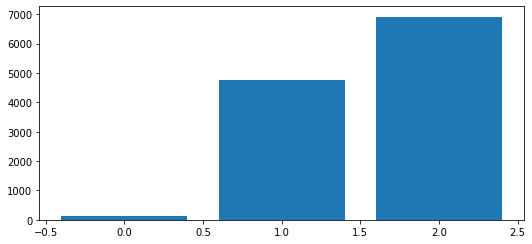

In [ ]:
fig = plt.bar(counter.keys(),counter.values())
fig

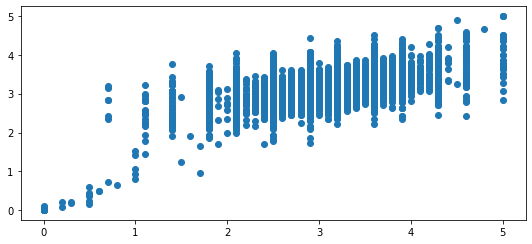

In [ ]:
plt.scatter(data['agreeableness'],data['Avg_Personality'])
plt.show()

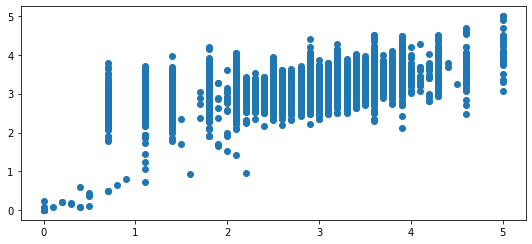

In [ ]:
plt.scatter(data['extraversion'],data['Avg_Personality'])
plt.show()

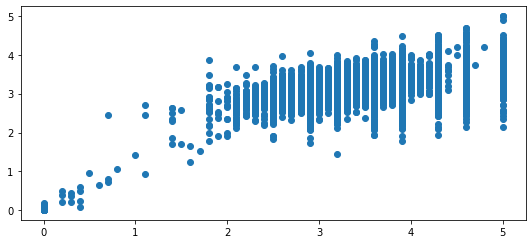

In [ ]:
plt.scatter(data['openness'],data['Avg_Personality'])
plt.show()

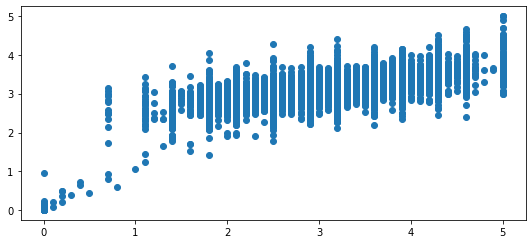

In [ ]:
plt.scatter(data['neuroticism'],data['Avg_Personality'])
plt.show()

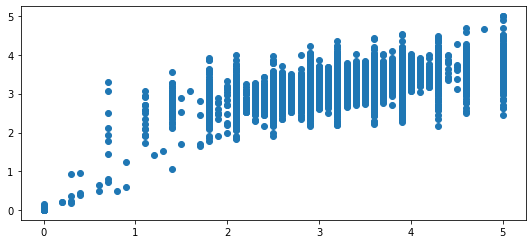

In [ ]:
plt.scatter(data['conscientiousness'],data['Avg_Personality'])
plt.show()

In [ ]:
x = counter.keys()
y = data['Test']

In [ ]:
oversample = SMOTE()

In [ ]:
X1 = X
y1 = y
X1, y1 = oversample.fit_resample(X1, y1)

In [ ]:
counter = Counter(y1)
print(counter)

Counter({2: 6922, 1: 6922, 0: 6922})


In [ ]:
X1.shape

(20766, 8)

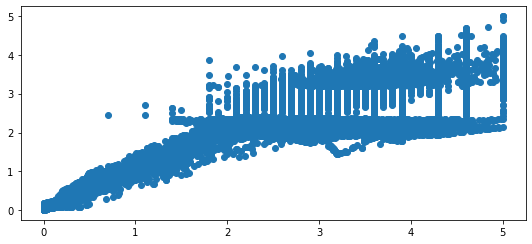

In [ ]:
fig_open = plt.scatter(X1['openness'],X1['Avg_Personality'])
fig_open

In [ ]:
undersample = RandomUnderSampler()

In [ ]:
X2 = X
y2 = y
X2, y2 = undersample.fit_resample(X2, y2)

In [ ]:
counter = Counter(y2)
print(counter)

Counter({0: 143, 1: 143, 2: 143})


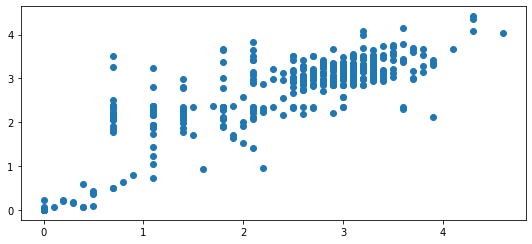

In [ ]:
plt.scatter(X2['extraversion'],X2['Avg_Personality'])
plt.show()

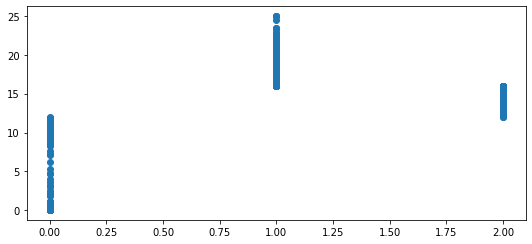

In [ ]:
plt.scatter(data['Test'],data['Personality'])
plt.show()

In [ ]:
import hvplot.pandas
import panel as pn
sel_origin = pn.widgets.Select(options=[2.9,5.0],name='categories')
sel_cyl = widgets.FloatSlider(value = 50, min=1.0,max=5.0)
# @pn.depends(sel_origin,sel_cyl)
# def exp_plot(sel_origin,sel_cyl):
#   return data[(data.openness == sel_origin) & (data.Avg_Personality==sel_cyl)].hvplot.scatter(x= 'openness',y= ['extraversion','agreeableness'],xlim = (0,4),ylim = (0,4))
# pn.Column(sel_origin,sel_cyl,exp_plot,background='WhiteSmoke').embed()


In [ ]:
slider = widgets.FloatSlider(value = 50, min=1.0,max=5.0)
slider.style.handle_color='lawngreen'
slider_label = widgets.Label('freq')
slider_comp = widgets.HBox([slider_label, slider])
widgets.VBox([slider_comp])

In [ ]:
data.columns

Index(['Unnamed: 0', 'openness', 'agreeableness', 'neuroticism',
       'conscientiousness', 'extraversion', 'Personality', 'Test',
       'Avg_Personality'],
      dtype='object')

##Muller Loop

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time

names = ["Nearest Neighbors", "Linear SVM", "RBF", "SVC","Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [ ]:
X = data.drop(['Test'], axis=1)
y = data['Test']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
classifiers = [
    RandomForestClassifier(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=17,learning_rate_init=0.01,max_iter=250),
    SVC(random_state = 17),
    DecisionTreeClassifier(max_depth=3, random_state=17)

]

In [ ]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.65, Training time = 0.05 seconds
Classifier = Linear SVM, Score (test, accuracy) = 63.41, Training time = 0.09 seconds
Classifier = RBF, Score (test, accuracy) = 77.65, Training time = 3.86 seconds
Classifier = SVC, Score (test, accuracy) = 57.67, Training time = 6.92 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 99.58, Training time = 0.01 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Gaussian Process, Score (test, accuracy) = 99.58
